## Plane Projections and Linear Transformations

In 3D graphics, everything we see on a 2D screen is a projection of a 3D world. This lab explores how **linear transformations** are used to project points and shapes from three dimensions onto a plane—just like how a camera projects a 3D scene onto a 2D image sensor. Understanding these projections is essential for rendering, animation, and simulation in computer graphics.


### Part 1: Identifying the standard matrix of the projection onto a plane
The transformation to project onto a plane with normal  $\overrightarrow{n}$ is given by $T(\overrightarrow{x}) = \overrightarrow{x} - \text{proj}_{\overrightarrow{n}}\overrightarrow{x}$ (why?).

The function in the cell below can compute this transformation so long as you provide the $\overrightarrow{x}$ and $\overrightarrow{n}$. That is, the function computes

$$ \overrightarrow{x} - \frac{\overrightarrow{x}\cdot\overrightarrow{n}}{|| \overrightarrow{n} ||^2}\overrightarrow{n} $$

In [ ]:
# Calculates the projection of the given point x onto the plane with normal n
def plane_projection(x,n):
    numerator = x.dot_product(n)
    denominator = n.norm()*n.norm()
    proj = x - (numerator/denominator) * n
    return proj

<div style="background-color: lightpink; color:black; padding: 10px">

### Question 1 

Using the function above calculate the projection of the point $(3,4,1)$ onto the plane $2x + 3y - z = 0$. Go into Learn and choose the correct answer. You may use the empty cell below to run the necessary code.
    
</div>

In [5]:
# define your values below and use the function above as needed
def plane_projection(x,n):
    numerator = x.dot_product(n)
    denominator = n.norm()*n.norm()
    proj = x - (numerator/denominator) * n
    return proj

x = vector([3,4,1])
n = vector([2,3,-1])

show(plane_projection(x,n))


(4/7, 5/14, 31/14)

Recall to generate the standard matrix of a transformation we use the standard basis. Complete the function `std_matrix_for_plane_proj` in the cell below which we will then be able to use to generate the standard matrix for any plane projection with a given normal `n`.

In [10]:
def std_matrix_for_plane_proj(n):
    # each c variable represents a column in the final standard matrix
    e1 = vector([1,0,0]) 
    e2 = vector([0,1,0]) 
    e3 = vector([0,0,1]) 


    
    c1 = plane_projection(e1, n)
    c2 = plane_projection(e2, n)
    c3 = plane_projection(e3, n)

    
    return column_matrix([c1, c2, c3])


show(std_matrix_for_plane_proj(vector([0,0,1]))) # [0,0,1] reps the x-y plane normal

[1 0 0]
[0 1 0]
[0 0 0]

<div style="background-color: lightpink; color:black; padding: 10px">

### Question 2 

Using the function above calculate the standard matrix of the projection onto the $xy$ plane. You can use the cell below as your workspace. Once complete choose the correct answer in Learn corresponding to this matrix.
    
</div>

In [4]:
# this cell is your workspace for the previous question


### Part 2: Projection of multiple points onto different coordinate planes

Let us now try to take a collection of points in 3D and slowly identify what object they make by getting different viewpoints.

First we create the list of points and corresponding edges. Run the cell below to build these (it also contains a helper function to plot a list of 2d points and edges which we will use later):



In [13]:
#Define the 3D points

OBJ_VERTICES_3D = [
    vector([1, 1, 2]),  # V0
    vector([3, 1, 2]),  # V1
    vector([3, 3, 4]),  # V2
    vector([1, 3, 4]),  # V3
    vector(QQ,[1.5, 2.5, 7]) # V4
]

# Edges: pairs of vertex indices 
# this list simply tells us that, for example, V0 and V1 should be connected but not V0 and V2
OBJ_EDGES = [
    (0, 1), (1, 2), (2, 3), (3, 0),  
    (0, 4), (1, 4), (2, 4), (3, 4)   
]



# --- Function to help plot a list of 2d points based off of the edges in OBJ_EDGES
def plot_shape_2d(list_of_2d_points, draw_axes_for_plane=None):
    """
    Plots a 2D shape given a list of 2D SageMath vectors.
    Connects them using the global OBJ_EDGES.
    No axes are drawn by default.
    
    Args:
        list_of_2d_points: A list of SageMath 2D vectors.
        draw_axes_for_plane (str, optional): If 'xy', 'xz', or 'yz', it will attempt
                                           to label axes accordingly. Otherwise, no labels.
    """
    if not list_of_2d_points:
        print("No 2D points to plot.")
        return

    g = Graphics()
    for edge in OBJ_EDGES:
        # Ensure points are 2D and convert to RDF list for plotting
        p1_raw = list_of_2d_points[edge[0]]
        p2_raw = list_of_2d_points[edge[1]]

        if len(p1_raw) != 2 or len(p2_raw) != 2:
            print("Error: Points provided to plot_shape_2d must be 2D.")
            return

        p1 = list(vector(RDF, p1_raw)) # Convert to RDF for plotting
        p2 = list(vector(RDF, p2_raw))
        g += line([p1, p2], color='blue', thickness=1.5)

    # For the optional axis labels
    show_axes_bool = False
    axes_labels_val = [None, None] # Default no labels

    if draw_axes_for_plane:
        show_axes_bool = True
        if draw_axes_for_plane.lower() == 'xy':
            axes_labels_val = ['X', 'Y']
        elif draw_axes_for_plane.lower() == 'xz':
            axes_labels_val = ['X', 'Z']
        elif draw_axes_for_plane.lower() == 'yz':
            axes_labels_val = ['Y', 'Z']
        else: # If some other string, split at comma if it exists otherwise default to generic names
            if draw_axes_for_plane.find(','):
                axes = draw_axes_for_plane.split(',')
                axes_labels_val = [axes[0].strip(),axes[1].strip()]
            else:
                axes_labels_val = ['Axis 1', 'Axis 2']


    g.show(axes=show_axes_bool, axes_labels=axes_labels_val, aspect_ratio=1, figsize=4)


In order to use the `plot_shape_2d` function to plot the points above (along with their connected edges) the points need to only have 2 values since all screens are inherently 2 dimensional. Let us first see what they look like on the xy plane.


#### Your task:
Fill in the ??? spots in the cell below and then run it. Most of the work is done for you but it should accomplish the following:
- Define $\overrightarrow{n}_{xy}$ (the normal to the $xy$ plane) in code.
- Get $P_{xy}$ which is the standard matrix of the projection onto the $xy$ plane. Use the previously defined `std_matrix_for_plane_proj` function.
- Apply $P_{xy}$ to each 3D vertex. That is, simply multiply $P_{xy}$ times each vector representing the object vertices. This will still give points in $\mathbb{R}^3$.
- Extract the X and Y components from these projected 3D vertices to create a new list of 2D vectors called `points_for_xy_plot`.
- Use the provided `plot_shape_2d()` function to plot these 2D points.

P_{xy} =  [1 0 0]
[0 1 0]
[0 0 0]

'original points:' [(1, 1, 2), (3, 1, 2), (3, 3, 4), (1, 3, 4), (3/2, 5/2, 7)]

'projected points:' [(1, 1, 0), (3, 1, 0), (3, 3, 0), (1, 3, 0), (3/2, 5/2, 0)]

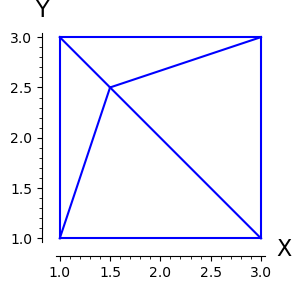

In [14]:
# 1. Define the normal vector for the XY-plane
normal_xy =  vector([0,0,1]) 

# 2. Get the projection matrix
P_xy = std_matrix_for_plane_proj(normal_xy) 
show(LatexExpr("P_{xy} = "), P_xy)

# 3 apply projection matrix to each original point
projected_vertices_on_xy_plane = [P_xy * v for v in OBJ_VERTICES_3D]
show("original points:",OBJ_VERTICES_3D)
show("projected points:",projected_vertices_on_xy_plane)

# 4. Extract X and Y components for 2D plotting
points_for_xy_plot = [vector([p3d[0], p3d[1]]) for p3d in projected_vertices_on_xy_plane]


# 5. Plot the 2D result
plot_shape_2d(points_for_xy_plot, draw_axes_for_plane='xy') # Optionally label axes


<div style="background-color: lightpink; color:black; padding: 10px">

### Question 3

Based on your result for $P_{xy}$ answer the questions in Learn related to rank and invertibility.
    
</div>

#### xz and yz planes

Let us now repeat part of the process above but for the $xz$ and $yz$ planes. This should help us to identify something very important.

Fill in the two ??? below for each normal vector and then examine the output of the set of points.

In [15]:
# ------ XZ projection -----
#Define the normal vector for the XZ-plane
normal_xz =  vector([0,1,0])

# apply projection matrix to each original point
projected_vertices_on_xz_plane = [std_matrix_for_plane_proj(normal_xz) * v for v in OBJ_VERTICES_3D]


# ---- YZ projection ---------
#Define the normal vector for the XZ-plane
normal_yz =  vector([1,0,0])

# apply projection matrix to each original point
projected_vertices_on_yz_plane = [std_matrix_for_plane_proj(normal_yz) * v for v in OBJ_VERTICES_3D]



show("original points:",OBJ_VERTICES_3D)
show("projected xz points:",projected_vertices_on_xz_plane)
show("projected yz points:",projected_vertices_on_yz_plane)
show("projected xy points:", projected_vertices_on_xy_plane, "(from previous exercise)")

'original points:' [(1, 1, 2), (3, 1, 2), (3, 3, 4), (1, 3, 4), (3/2, 5/2, 7)]

'projected xz points:' [(1, 0, 2), (3, 0, 2), (3, 0, 4), (1, 0, 4), (3/2, 0, 7)]

'projected yz points:' [(0, 1, 2), (0, 1, 2), (0, 3, 4), (0, 3, 4), (0, 5/2, 7)]

'projected xy points:' [(1, 1, 0), (3, 1, 0), (3, 3, 0), (1, 3, 0), (3/2, 5/2, 0)] '(from previous exercise)'

#### Zeros everywhere

You should notice something interesting (and hopefully intuitive) about each of the projected points. Specifically when we project onto $xy$ we are essentially just dropping the $z$ value. When we project onto $xz$ we are dropping the $y$ value. A similar result occurs for the $yz$ plane. 

More precisely, it's not so much that we are dropping these values with the projection. It's that we are flattening the point such that it's appropriate component becomes 0 AND THEN we drop those zero values in order to plot them on a 2d screen.

For example to plot the $yz$ points we need to extract the second and third components of the resulting list.

Run the cell below to accomplish this and see the resulting image

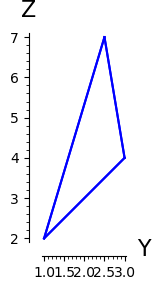

In [16]:
points_for_yz_plot = [vector([p3d[1], p3d[2]]) for p3d in projected_vertices_on_yz_plane]
plot_shape_2d(points_for_yz_plot, draw_axes_for_plane='yz')

### Part 3: Projecting onto an Arbitrary Plane

So far, we have projected our object onto the main coordinate planes $z=0, y=0$ and $x=0$. But what happens when we want to view our object from an angle, for instance, by projecting it onto a tilted plane like the one defined by the equation $x + z = 0$ (this plane has normal $\vec{n} = (1, 0, 1)$ which corresponds to being halfway between the horizontal view and an overhead view)?

We can use our `std_matrix_for_plane_proj` function with this normal vector to get the projected 3D points. 

Enter the correct normal in the cell below and run it to get the required projection of our original points


In [17]:
#Define the normal vector for the tilted plane x + z = 0
normal_tilt =  vector([1,0,1])

# apply projection matrix to each original point
projected_vertices_on_tilted_plane = [std_matrix_for_plane_proj(normal_tilt) * v for v in OBJ_VERTICES_3D]


show("original points:",OBJ_VERTICES_3D)
show("projected points onto x + z = 0 :",projected_vertices_on_tilted_plane)

'original points:' [(1, 1, 2), (3, 1, 2), (3, 3, 4), (1, 3, 4), (3/2, 5/2, 7)]

'projected points onto x + z = 0 :' [(-1/2, 1, 1/2),
 (1/2, 1, -1/2),
 (-1/2, 3, 1/2),
 (-3/2, 3, 3/2),
 (-11/4, 5/2, 11/4)]

<div style="background-color: lightpink; color:black; padding: 10px">

### Question 4

Based on the projected points above, what is the y value of the point whose z value is $\frac{3}{2}$? Place your answer in Q4 on the Learn quiz.    
</div>

Given the output in the last cell which values do we drop? Do we drop any?? Somehow we need to get only 2 values from each point in order to plot on the screen.


To do this **we need to create a basis** for the plane $x + z = 0$ and identify how each of the points above can be written in terms of this basis.


#### The "Camera Roll" Problem

For any given plane, there are infinitely many possible bases we could choose. Generally speaking it is best to choose a basis that is orthogonal AND whose vectors are unit length (such a basis is often called **orthonormal**). 

Even with this condition however there are still an infinite set of orthonormal bases to choose from. For example even on a standard xy plane you could imagine picking a basis as $B_1 = \left\{\left[\begin{array}{c} 1 \\ 0 \end{array}\right], \left[\begin{array}{c} 0 \\ 1 \end{array}\right]\right\}$ or different basis as $B_2 = \left\{\left[\begin{array}{c} -1 \\ 0 \end{array}\right], \left[\begin{array}{c} 0 \\ 1 \end{array}\right]\right\}$ or any pair of orthogonal vectors that we arbitrarily rotate from the standard basis. (e.g. $\left\{\left[\begin{array}{c} \cos(30^\circ) \\ \sin(30^\circ) \end{array}\right], \left[\begin{array}{c} \cos(120^\circ) \\ \sin(120^\circ) \end{array}\right]\right\}$


Picking one randomly is like taking a picture while tilting your head at a random angle. The resulting 2D image would be unpredictably rotated, which is disorienting.

#### The Solution: Anchoring to "World Up"

To get a stable, predictable view with "no head tilt," we must define an anchor. We need a constant "up" direction for our entire 3D world. For this lesson we will follow the standard convention for mathematics and engineering where the **Z-axis is "up"**.

(***Note:*** In many video game engines and computer graphics applications, the Y-axis is used as the "world up" direction since those coordinates systems have Y as the vertical direction.)

**Our rule:** The "up" direction for our entire world is $\overrightarrow{\text{WORLD\_UP}} = \left[\begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right]$ which we will label as `WORLD_UP = vector([0, 0, 1])` in code.

A view has "no roll" (i.e. no tilt) if its horizontal axis is truly horizontal (i.e., it lies on the world's XY-plane and is therefore perpendicular to `WORLD_UP`). This gives us a clear, step-by-step procedure to find the one "correct" basis for any plane:

1.  **Find the view's "Right" direction ($\overrightarrow{b_1}$):** This vector must be horizontal (i.e. on the $xy$ plane), so it must be perpendicular to `WORLD_UP`. It must also be on our viewing plane, so it must be perpendicular to our plane's normal vector $\overrightarrow{n}$. The cross product `WORLD_UP`$\times \overrightarrow{n}$ gives us exactly this.
2.  **Find the view's "Up" direction ($\overrightarrow{b_2}$):** With our viewing direction $\overrightarrow{n}$ and "right" direction $\overrightarrow{b_1}$ established, the "up" for our view can now be determined. It must be perpendicular to both, so we use the cross product $\overrightarrow{n}\times\overrightarrow{b_1}$. (Though we call our plane's normal $\overrightarrow{n}$ the *viewing direction* you can think of it as the vector shooting directly into our eyes)
3.  **Normalize:** We make both $\overrightarrow{b_1}$ and $\overrightarrow{b_2}$ unit vectors.

Let's apply this logic to our plane.



#### Finding our needed basis

Let's manually calculate the basis for the plane $x + z = 0$ using the logic above.

**Step 1: Define Our Knowns**
Our planes normal vector is $\overrightarrow{n} = \left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right]$ and our world's up vector is $\text{WORLD\_UP} = \left[\begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right]$.

**Step 2: Calculate the "Right" Vector ($\overrightarrow{b_1}$)**
This is vector on the $xy$ plane that is perpendicular to both the world's up vector and our normal vector.

$$ \overrightarrow{b}_{1, \text{raw}} = \text{WORLD\_UP} \times \overrightarrow{n} =  \left[\begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right] \times \left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right]  = \left[\begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right]$$



**Step 3: Calculate the "Up" Vector ($\overrightarrow{b_2}$)**
This is the vector on the plane we are projecting onto that we want to line up with our screens vertical axis. In 3-space it will be perpendicular to our normal vector and the "right" vector we just calculated.

$$ \overrightarrow{b}_{2, \text{raw}} = \overrightarrow{n} \times \vec{b}_{1, \text{raw}} = \left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right] \times \left[\begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right]= \left[\begin{array}{c} -1 \\ 0 \\ 1 \end{array}\right]  $$


**Step 4: Normalize the Basis Vectors**
We make both vectors have a length of 1 to create our final orthonormal basis.
*   $||\vec{b}_{1, \text{raw}}|| = \left|\left|\left[\begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right]\right|\right| = 1$
*   $||\vec{b}_{2, \text{raw}}|| = \left|\left|\left[\begin{array}{c} -1 \\ 0 \\ 1 \end{array}\right]\right|\right| = \sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{2}$

Our final basis vectors are:

$$ \overrightarrow{b_1} = \left[\begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right] $$
$$ \overrightarrow{b_2} = \left[\begin{array}{c} -\frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}}\end{array} \right] \approx \left[\begin{array}{c} -0.707\\ 0\\ 0.707\end{array}\right] $$

This basis represents a level view onto the tilted plane. Given the nature of the plane we are projecting onto ($x + z = 0$) it should make sense that our screens horizontal axis will still correspond to the world's Y-direction. The new change will be that our screens vertical axis will now correspond to this tilted $\overrightarrow{b_2}$ vector.

The next question though is how do we use this basis to actually extract the values from the projected points!!!!

#### Finding Coordinates with an Orthonormal Basis

The answer lies in the power of an orthonormal basis. Recall that for any vector $\overrightarrow{p}$ that lies on the plane spanned by our basis $\{\overrightarrow{b_1}, \overrightarrow{b_2}\}$, we can write it as a unique linear combination:

$ \overrightarrow{p} = c_1 \overrightarrow{b_1} + c_2 \overrightarrow{b_2} $


The pair of scalars $(c_1, c_2)$ are known as the **coordinates** of $\overrightarrow{p}$ with respect to our new basis. This 2D vector is exactly what we need to plot!

So how do we find $c_1$ and $c_2$? We could solve a system of linear equations for every single point, but because our basis is **orthonormal**, there is a beautiful shortcut using the dot product.

Let's find $c_1$ by taking the dot product of the entire equation with $\overrightarrow{b_1}$:

$$ \overrightarrow{p} \cdot \overrightarrow{b_1} = (c_1 \overrightarrow{b_1} + c_2 \overrightarrow{b_2}) \cdot \overrightarrow{b_1} $$

Using the distributive property of the dot product:

$$ \overrightarrow{p} \cdot \overrightarrow{b_1} = c_1(\overrightarrow{b_1} \cdot \overrightarrow{b_1}) + c_2(\overrightarrow{b_2} \cdot \overrightarrow{b_1}) $$

Now, because the basis is orthonormal, we know two key facts:
*   $\overrightarrow{b_1} \cdot \overrightarrow{b_1} = ||\overrightarrow{b_1}||^2 = 1^2 = 1$
*   $\overrightarrow{b_2} \cdot \overrightarrow{b_1} = 0$ (they are orthogonal)

Substituting these values in simplifies the equation dramatically:

$$ \overrightarrow{p} \cdot \overrightarrow{b_1} = c_1(1) + c_2(0) $$
$$ c_1 = \overrightarrow{p} \cdot \overrightarrow{b_1} $$

Similarly, if we dot the original equation with $\overrightarrow{b_2}$, we find that $c_2 = \overrightarrow{p} \cdot \overrightarrow{b_2}$.

**This is our solution!** The new 2D coordinates for any projected point $\overrightarrow{p}$ are simply **$(\overrightarrow{p} \cdot \overrightarrow{b_1}, \overrightarrow{p} \cdot \overrightarrow{b_2})$**.


<div style="background-color: lightpink; color:black; padding: 10px">

### Question 5

Let us use our previously determined basis for the plane $x + z = 0$  $$ \overrightarrow{b_1} = \left[\begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right] $$
$$ \overrightarrow{b_2} = \left[\begin{array}{c} -\frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}}\end{array} \right] $$   
   
We previously found that the point $(3,3,4)$ projects onto our plane as $(-\frac{1}{2},3,\frac{1}{2})$.
    
Find the values of $c_1$ and $c_2$ such that the projected point $\overrightarrow{p} = (-\frac{1}{2},3,\frac{1}{2})$ can be written in terms of our basis vectors as $$\overrightarrow{p} = c_1\overrightarrow{b_1} + c_2\overrightarrow{b_2}$$
    
   
In principle this can be done with code and so the basis vectors and the point have been defined in the cell below should you wish to use them. In this particular case it's likely easy to eyeball the values. **Enter your answer in Learn**.
    
As you can imagine, for a larger set of values (which we will do shortly) it will be handy to run some code to find all of the coordinates and then plot them.
</div>

In [30]:
b1 = vector([0, 1, 0])
b2 = vector([-1/sqrt(2), 0, 1/sqrt(2)])
p = vector([-1/2,3,1/2])

A = matrix([b1, b2]).transpose() ## converts b1 and b2 into matrix (b1 = col1) (b2 = col2) 

augment = A.augment(p); 

show(augment.rref());

# add whatever code is needed below

[          1           0           3]
[          0           1 1/2*sqrt(2)]
[          0           0           0]

## Final task
### Finding the coordinates for all projected points and drawing them

In the cell below fill in the ??? and run the cell in order to plot what the view would look like if we were to "stare down" the plane's normal $(1,0,1)$ and see the our original points projected onto it. This will give you the view as if the camera rotated 45 degrees around the $y$-axis.

2D View of the Object Projected onto the Tilted Plane (x + z = 0):


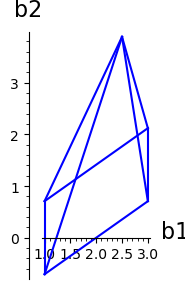

In [31]:
b1 = vector([0, 1, 0])
b2 = vector([-1/sqrt(2), 0, 1/sqrt(2)])

# We previously calculated all projected points and stored in the variable projected_vertices_on_tilted_plane

# For each point p calculate the 2D coordinates 
points_for_tilted_plot = [vector([p.dot_product(b1), p.dot_product(b2)]) for p in projected_vertices_on_tilted_plane]

#p.dot_product(b1) -> coordinate of p along b1 (the y-axis direction on the plane)
#p.dot_product(b2) -> coordinate of p along b2 (the tilt direction within the xz-plane)

#p = projected 3D point

# Now plot all of these coordinates as if the tilted plane is our new screen orientation!!!
print("2D View of the Object Projected onto the Tilted Plane (x + z = 0):")
plot_shape_2d(points_for_tilted_plot, draw_axes_for_plane='b1, b2')

<div style="background-color: lightpink; color:black; padding: 10px">

### Question 6

Based on your resulting image what is (approximately) the largest coordinate value being used by the $b_2$ basis vector. Answer in Learn.
</div>

### Full rotation time

You can view this object and rotate freely where the calculations happen in real-time by visiting: https://www.geogebra.org/m/xfvqsymc

Important note: If you compare the peak of the image you generated and the one in the geogebra object you might think there's a discrepancy. This is not the case however. The image above is referencing our new basis whereas geogebra only plots the standard basis in $\mathbb{R}^3$